# Earth Day 2022 Tweets Analysis
### Dataset Used - https://www.kaggle.com/datasets/nabanitaroy/earthday2022tweets

## Import Required Python Libraries

In [1]:
import pandas as pd
import os

In [4]:
# check current working direcorty
os.getcwd()

'D:\\Anaconda_Jupyter_Notebooks\\ML_Project'

In [7]:
# Get list of files and directories in current working dir
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Disease_Testing.csv',
 'Disease_Training.csv',
 'earth_day_tweets.csv',
 'Earth_Day_Tweets_Analysis.ipynb']

## Import Earth Day tweets file and Check Data

In [195]:
tweets = pd.read_csv('earth_day_tweets.csv')
tweets.head()

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
0,RT @POTUS: As we celebrate the progress we’ve ...,NaN,POTUS,NaN,POSITIVE,optimism
1,"This #EarthDay, I'm happy to be meeting with P...","EarthDay,GetTheLeadOut",PennEnvironment,NaN,POSITIVE,optimism
2,RT @Khan__sir_patna: All of people wishes and ...,EarthDay,Khan__sir_patna,NaN,POSITIVE,joy
3,RT @CapsCoalition: Biden Signs Executive Order...,EarthDay,CapsCoalition,NaN,POSITIVE,optimism
4,RT @tamannaahspeaks: Animals source their food...,MyconnectwithSoil,"tamannaahspeaks,SadhguruJV,cpsavesoil",NaN,POSITIVE,optimism


In [196]:
# Check structure of data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100099 entries, 0 to 100098
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          100099 non-null  object
 1   hash_tags     62943 non-null   object
 2   account_tags  76952 non-null   object
 3   emoji_lists   38308 non-null   object
 4   sentiment     100099 non-null  object
 5   emotion       100099 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [197]:
# Check more insights of each column
tweets.describe()

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
count,100099,62943,76952,38308,100099,100099
unique,50183,15123,23596,6677,2,4
top,RT @BarackObama: When it comes to climate chan...,EarthDay,cpsavesoil,['🌎'],POSITIVE,joy
freq,655,19566,3261,7466,66089,56309


In [198]:
tweets.count()

text            100099
hash_tags        62943
account_tags     76952
emoji_lists      38308
sentiment       100099
emotion         100099
dtype: int64

## Clean-up Dataset

### 1. Clean-up duplicate data

In [199]:
# Check for duplicate values 
tweets[tweets.duplicated()].count()

text            49916
hash_tags       30628
account_tags    49646
emoji_lists     18358
sentiment       49916
emotion         49916
dtype: int64

In [200]:
# Drop duplicate rows
tweets.drop_duplicates(inplace=True)
tweets[tweets.duplicated()]

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion


In [201]:
tweets.describe()

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
count,50183,32315,27306,19950,50183,50183
unique,50183,15123,23596,6677,2,4
top,RT @POTUS: As we celebrate the progress we’ve ...,EarthDay,cpsavesoil,['🌎'],POSITIVE,joy
freq,1,8880,148,3770,35402,29342


### 2. Clean-up NULL values

In [202]:
# Check for NULL values for each column
tweets.isna().sum()

text                0
hash_tags       17868
account_tags    22877
emoji_lists     30233
sentiment           0
emotion             0
dtype: int64

In [203]:
# Drop rows having NULL values in any column
tweets.dropna(inplace=True)
tweets.isna().sum()

text            0
hash_tags       0
account_tags    0
emoji_lists     0
sentiment       0
emotion         0
dtype: int64

In [204]:
tweets.describe()

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
count,7651,7651,7651,7651,7651,7651
unique,7651,4089,7041,3253,2,4
top,RT @ZLabe: ➡️ Create your own climate change s...,EarthDay,EarthDay,['🌎'],POSITIVE,joy
freq,1,2085,38,1235,5188,4862


In [205]:
# Dataframe index has been messed up due to deleting rows
tweets.head()

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
13,RT @ZLabe: ➡️ Create your own climate change s...,"EarthDay,Arctic",ZLabe,['➡'],NEGATIVE,joy
14,"RT @LMMontgomeryLS: Oh, I don’t mean just the ...",EarthDay,LMMontgomeryLS,['🎨'],POSITIVE,joy
30,RT @OutrageOptimism: The path ahead will be fu...,EarthDay,OutrageOptimism,"['🌍', '🎧']",POSITIVE,optimism
46,RT @nftjakey: 🌎EARTH DAY GIVEAWAY!🌎\n\nPrizes:...,"ad,solana,NFTGiveaway","nftjakey,nftjakey,ZombieTurtleNFT","['🌎', '🌎', '🏆', '🏆', '4️⃣']",NEGATIVE,joy
47,RT @uLethbridgeORIS: Happy Earth Day 🌱\n\n#Ear...,"EarthDay,enviornment,GreenEnergy,EarthDay2022",uLethbridgeORIS,['🌱'],POSITIVE,joy


In [206]:
# Rebuils the dataframe index
tweets.reset_index(inplace=True)
tweets.head()

,index,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
0,13,RT @ZLabe: ➡️ Create your own climate change s...,"EarthDay,Arctic",ZLabe,['➡'],NEGATIVE,joy
1,14,"RT @LMMontgomeryLS: Oh, I don’t mean just the ...",EarthDay,LMMontgomeryLS,['🎨'],POSITIVE,joy
2,30,RT @OutrageOptimism: The path ahead will be fu...,EarthDay,OutrageOptimism,"['🌍', '🎧']",POSITIVE,optimism
3,46,RT @nftjakey: 🌎EARTH DAY GIVEAWAY!🌎\n\nPrizes:...,"ad,solana,NFTGiveaway","nftjakey,nftjakey,ZombieTurtleNFT","['🌎', '🌎', '🏆', '🏆', '4️⃣']",NEGATIVE,joy
4,47,RT @uLethbridgeORIS: Happy Earth Day 🌱\n\n#Ear...,"EarthDay,enviornment,GreenEnergy,EarthDay2022",uLethbridgeORIS,['🌱'],POSITIVE,joy


### 3. Check for leading and trailing spaces in tweets

In [207]:
tweets.head()

,index,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
0,13,RT @ZLabe: ➡️ Create your own climate change s...,"EarthDay,Arctic",ZLabe,['➡'],NEGATIVE,joy
1,14,"RT @LMMontgomeryLS: Oh, I don’t mean just the ...",EarthDay,LMMontgomeryLS,['🎨'],POSITIVE,joy
2,30,RT @OutrageOptimism: The path ahead will be fu...,EarthDay,OutrageOptimism,"['🌍', '🎧']",POSITIVE,optimism
3,46,RT @nftjakey: 🌎EARTH DAY GIVEAWAY!🌎\n\nPrizes:...,"ad,solana,NFTGiveaway","nftjakey,nftjakey,ZombieTurtleNFT","['🌎', '🌎', '🏆', '🏆', '4️⃣']",NEGATIVE,joy
4,47,RT @uLethbridgeORIS: Happy Earth Day 🌱\n\n#Ear...,"EarthDay,enviornment,GreenEnergy,EarthDay2022",uLethbridgeORIS,['🌱'],POSITIVE,joy


In [208]:
# Check for leading spaces in the tweets (text column)
leading_space = []
[leading_space.append(i) for i in tweets['text'].index if re.findall(r'^\s.+', tweets['text'][i])]
len(leading_space)
# There is no leading space in any tweet

0

In [244]:
# Check for trailing spaces in the tweets (text column)
trailing_space = []

[trailing_space.append(i) for i in tweets['text'].index if re.findall(r'.+\s$', tweets['text'][i])]

len(trailing_space)
# There is no trailing space in any tweet

0

## Analyse Data

### 1. Get Hashtags and Accounts mentioned in tweets

In [210]:
import re

# Creating new dataFrame with only text column
tweet_df = pd.DataFrame(tweets['text'])
tweet_df.head()

,text
0,RT @ZLabe: ➡️ Create your own climate change s...
1,"RT @LMMontgomeryLS: Oh, I don’t mean just the ..."
2,RT @OutrageOptimism: The path ahead will be fu...
3,RT @nftjakey: 🌎EARTH DAY GIVEAWAY!🌎\n\nPrizes:...
4,RT @uLethbridgeORIS: Happy Earth Day 🌱\n\n#Ear...


In [211]:
tweet_df['text'][0]

'RT @ZLabe: ➡️ Create your own climate change stripes for #EarthDay ! https://t.co/qDqGQvLNkJ\n\nHere is how much the #Arctic is warming up... \U0001f979 https://t.co/OmNocSjzZs'

In [213]:
# Extract hash tags and mentioned accounts from first tweet using regex
re.findall( r'#[\w\d\S]+', tweet_df['text'][0]) , re.findall( r'@[\w\d\S]+', tweet_df['text'][0])

(['#EarthDay', '#Arctic'], ['@ZLabe:'])

In [216]:
# Extract hashtags and mentioned accounts in tweets and store them in 2 new columns in DataFrame

tweet_df['derv_hashtags'] = tweet_df['text'].apply(lambda x: re.findall(r'#(.+?)\s', x))
tweet_df['derv_accounts'] = tweet_df['text'].apply(lambda x: re.findall(r'@(.+?):?\s', x))
tweet_df.head()

,text,derv_hashtags,derv_accounts
0,RT @ZLabe: ➡️ Create your own climate change s...,"[EarthDay, Arctic]",[ZLabe]
1,"RT @LMMontgomeryLS: Oh, I don’t mean just the ...",[EarthDay],[LMMontgomeryLS]
2,RT @OutrageOptimism: The path ahead will be fu...,[EarthDay],[OutrageOptimism]
3,RT @nftjakey: 🌎EARTH DAY GIVEAWAY!🌎\n\nPrizes:...,"[ad, solana, NFTGiveaway]","[nftjakey, nftjakey, ZombieTurtleNFT]"
4,RT @uLethbridgeORIS: Happy Earth Day 🌱\n\n#Ear...,"[EarthDay, enviornment, GreenEnergy, EarthDay2...",[uLethbridgeORIS]


In [218]:
tweet_df.sample(5)

,text,derv_hashtags,derv_accounts
7364,"This #EarthDay, @CityofSanJose is stepping up ...","[EarthDay,, ClimateAction.]","[CityofSanJose, sliccardo, alex_lee, D4SanJose..."
7422,RT @NotreDameOCSB: Great to be out cleaning up...,"[EarthDay2022., ThisisND, OcsbBeCommunity, Ear...","[NotreDameOCSB, Outdoor_Easy]"
6024,RT @NCStateCALS: We couldn't pick just one. 📸\...,[ThinkAndDo],[NCStateCALS]
6406,🌍🌎The whole 🌍in his hands. Today is a great da...,"[EarthDay2022, EarthDay, OurGreatNationalParks]","[netflix, BarackObama]"
58,RT @KehkashanBasu: Happy #EarthDay!\nAt #Green...,"[EarthDay!, GreenHope,, EarthDayEveryday!, Ear...",[KehkashanBasu]


In [219]:
# Cross check for few tweets

tweet_df['text'][7422] , tweet_df['derv_hashtags'][7422] , tweet_df['derv_accounts'][7422]

('RT @NotreDameOCSB: Great to be out cleaning up our community on #EarthDay2022. Keep up the great work not only today but everyday. 🦅🌎#ThisisND #OcsbBeCommunity  #EarthDay #CleanUp @Outdoor_Easy https://t.co/Cq9gdKLWtH',
 ['EarthDay2022.', 'ThisisND', 'OcsbBeCommunity', 'EarthDay', 'CleanUp'],
 ['NotreDameOCSB', 'Outdoor_Easy'])

### 2. Visualize the top 20 hastags

In [275]:
all_hashtags = []

[all_hashtags.extend(i) for i in tweet_df['derv_hashtags'] ]
len(all_hashtags)

20663

In [296]:
from collections import Counter

most_used_hashtags = Counter(all_hashtags).most_common(20)
most_used_hashtags_df = pd.DataFrame(most_used_hashtags, columns = ['hashtag', 'frequency'])
most_used_hashtags_df

,hashtag,frequency
0,EarthDay,3765
1,EarthDay2022,902
2,EarthDay!,716
3,"EarthDay,",529
4,earthday,498
5,InvestInOurPlanet,276
6,SaveSoil,205
7,EarthDay22,204
8,MyConnectWithSoil,143
9,earthday2022,125


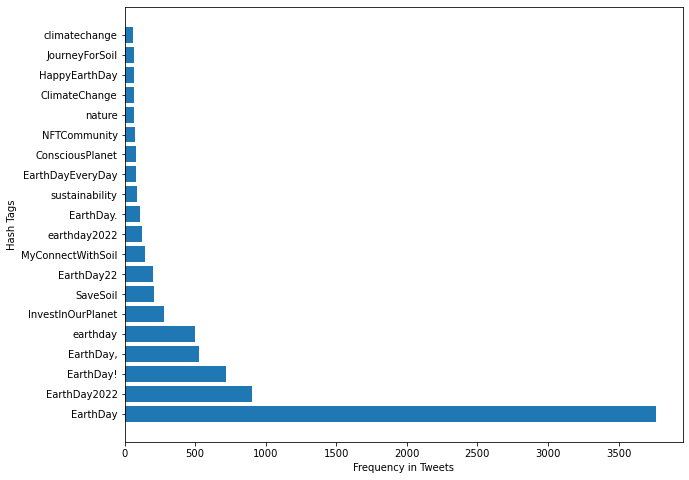

In [303]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(most_used_hashtags_df['hashtag'], most_used_hashtags_df['frequency'] )

ax.set_ylabel('Hash Tags')
ax.set_xlabel('Frequency in Tweets')

plt.show()